In [2]:
import pandas as pd

from sklearn import datasets, linear_model, preprocessing
from sklearn.metrics import mean_squared_error, r2_score
scaler = preprocessing.StandardScaler()

from matplotlib import pyplot as plt

import math

import cv2
import numpy as np
import imutils
import dlib
from imutils import face_utils
from numpy import savetxt

In [3]:
# Training based on random 1000 images

In [34]:
attribute_means = pd.read_csv("attribute_means.csv")
attribute_means.columns

Index(['stimulus', 'trustworthy', 'attractive', 'dominant', 'smart', 'age',
       'gender', 'weight', 'typical', 'happy', 'familiar', 'outgoing',
       'memorable', 'well-groomed', 'long-haired', 'smug', 'dorky',
       'skin-color', 'hair-color', 'alert', 'cute', 'privileged', 'liberal',
       'asian', 'middle-eastern', 'hispanic', 'islander', 'native', 'black',
       'white', 'looks-like-you', 'gay', 'electable', 'godly', 'outdoors'],
      dtype='object')

In [5]:
import os
import random
import pandas as pd
import shutil
sampled_df = attribute_means.sample(n=100, replace=False)

<AxesSubplot:>

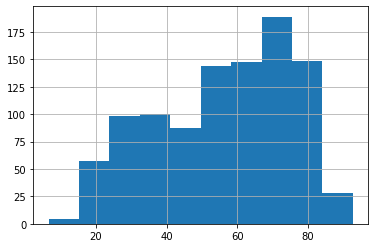

In [36]:
attribute_means['happy'].hist()

In [38]:
global_m = attribute_means['happy'].median()

In [16]:
new_folder_path = 'random100/'  # Replace 'path/to/new_folder' with the desired path for the new folder
os.makedirs(new_folder_path, exist_ok=True)

In [12]:
sampled_df

,stimulus,trustworthy,attractive,dominant,smart,age,gender,weight,typical,happy,...,hispanic,islander,native,black,white,looks-like-you,gay,electable,godly,outdoors
491,492,43.382022,52.538462,53.555556,55.894737,35.256410,76.238095,34.833333,72.027027,46.675676,...,46.351351,18.459459,28.526316,2.162162,75.864865,20.289474,52.921053,55.500000,51.756757,69.710526
975,976,54.911392,52.108108,55.358974,66.666667,33.760870,77.117647,32.648649,59.513514,35.945946,...,39.054054,46.775000,40.305556,8.405405,41.323529,21.500000,45.800000,67.536585,47.950000,16.119048
19,20,56.516129,41.135135,50.526316,52.675676,25.750000,60.783784,52.263158,47.625000,67.810811,...,45.842105,44.906977,24.390625,90.525000,2.264706,7.288889,75.371429,43.916667,67.052632,9.650000
589,590,57.297619,33.083333,63.219512,61.888889,64.000000,83.424242,61.305556,63.081081,35.594595,...,25.552632,26.714286,17.605263,96.657143,1.842105,9.277778,24.636364,75.457143,80.405405,11.945946
466,467,61.987952,49.555556,46.111111,71.405405,43.051282,24.333333,63.264706,62.361111,48.900000,...,36.282051,65.918919,56.410256,5.439024,23.891892,17.228571,28.176471,69.717949,62.475000,7.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,151,62.197531,42.500000,59.382353,58.975000,50.400000,88.444444,72.055556,72.805556,60.162162,...,27.681818,15.805556,11.000000,3.560976,91.780000,17.500000,27.512195,67.425000,69.687500,72.108108
492,493,68.425000,62.783784,25.750000,45.594595,6.744186,17.815789,46.833333,55.944444,18.073171,...,14.230769,6.323529,10.047619,0.722222,87.918919,11.147059,24.184211,2.282051,54.675676,59.121212
822,823,40.535714,59.621622,55.378378,56.864865,38.365854,81.081081,38.736842,54.256410,55.057143,...,68.000000,32.789474,28.707317,9.189189,58.729730,24.108108,40.484848,65.783784,49.472222,12.060606
753,754,43.102564,53.857143,56.942857,48.432432,31.938776,17.925000,54.540541,57.090909,26.461538,...,59.777778,29.552632,28.727273,12.588235,51.200000,23.705882,20.780488,49.121951,57.057143,47.200000


In [19]:
for index, row in sampled_df.iterrows():
    image_filename = str(int(row['stimulus'])) + '.jpg'  # Replace 'image_filename_column' with the actual column name containing the image filenames
    image_source_path = os.path.join('todorov_images/', image_filename)  # Assuming the original images are in the 'todorov_images' folder
    image_destination_path = os.path.join(new_folder_path, image_filename)
    shutil.copy(image_source_path, image_destination_path)

<AxesSubplot:>

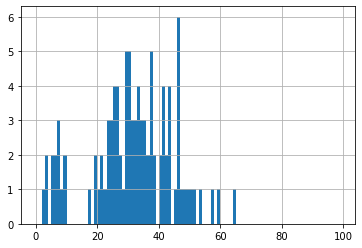

In [28]:
sampled_df['age'].hist(bins=np.arange(100))

In [48]:
young_y = (sampled_df['happy'].values>=global_m).astype(int)
np.save('young_y.npy',young_y)

In [47]:
young_y.sum()

44

In [21]:
new_folder_path = 'young100/'  # Replace 'path/to/new_folder' with the desired path for the new folder
os.makedirs(new_folder_path, exist_ok=True)

sorted_df = attribute_means.sort_values('age')
selected_rows = sorted_df.head(100)

for index, row in selected_rows.iterrows():
    image_filename = str(int(row['stimulus'])) + '.jpg'  # Replace 'image_filename_column' with the actual column name containing the image filenames
    image_source_path = os.path.join('todorov_images/', image_filename)  # Assuming the original images are in the 'todorov_images' folder
    image_destination_path = os.path.join(new_folder_path, image_filename)
    shutil.copy(image_source_path, image_destination_path)

In [49]:
random_y = (selected_rows['happy'].values>=global_m).astype(int)
np.save('random_y.npy',random_y)
random_y.

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0])

<AxesSubplot:>

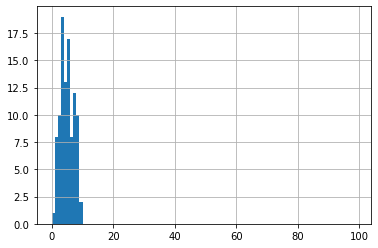

In [25]:
selected_rows['age'].hist(bins=np.arange(100))